In [2]:
import pandas as pd
import numpy as np

In [3]:
churn_data = pd.read_csv('Datas/churn_data.csv')
customer_data = pd.read_csv('Datas/customer_data.csv')
internet_data = pd.read_csv('Datas/internet_data.csv')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading and Understanding the Data and Merging Data


In [6]:
df_1 = pd.merge(churn_data, customer_data, how = 'inner', on = 'customerID')

In [7]:
telecom = pd.merge(df_1, internet_data, how = 'inner', on = 'customerID')

In [8]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
# Data Preparation

In [12]:
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes' : 1, 'No' : 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes' : 1, 'No' : 0})
telecom['Churn'] = telecom['Churn'].map({'Yes' : 1, 'No' : 0})
telecom['Partner'] = telecom['Partner'].map({'Yes' : 1, 'No' : 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

In [13]:
# Dummy Variable Creation

In [14]:
cont = pd.get_dummies(telecom['Contract'], prefix = 'Contract', drop_first = True)
telecom = pd.concat([telecom, cont], axis = 1)

In [15]:
pm = pd.get_dummies(telecom['PaymentMethod'], prefix = 'PaymentMethod', drop_first = True)
telecom = pd.concat([telecom, pm], axis = 1)

In [16]:
gen = pd.get_dummies(telecom['gender'], prefix = 'gender', drop_first = True)
telecom = pd.concat([telecom, gen], axis = 1)

In [17]:
ml = pd.get_dummies(telecom['MultipleLines'], prefix = 'MultipleLines')
mll = ml.drop(['MultipleLines_No phone service'], 1)
telecom = pd.concat([telecom, mll], axis = 1)

In [18]:
iser = pd.get_dummies(telecom['InternetService'], prefix = 'InternetService', drop_first = True)
telecom = pd.concat([telecom, iser], axis = 1)

In [19]:
os = pd.get_dummies(telecom['OnlineSecurity'], prefix = 'OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
telecom = pd.concat([telecom, os1], axis = 1)

In [20]:
ob = pd.get_dummies(telecom['OnlineBackup'], prefix = 'OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
telecom = pd.concat([telecom, ob1], axis = 1)

In [21]:
dp = pd.get_dummies(telecom['DeviceProtection'], prefix = 'DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
telecom = pd.concat([telecom, dp1], axis = 1)

In [22]:
tech = pd.get_dummies(telecom['TechSupport'], prefix = 'TechSupport')
tech1 = tech.drop(['TechSupport_No internet service'], 1)
telecom = pd.concat([telecom, tech1], axis = 1)

In [23]:
st = pd.get_dummies(telecom['StreamingTV'], prefix = 'StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
telecom = pd.concat([telecom, st1], axis = 1)

In [24]:
sm = pd.get_dummies(telecom['StreamingMovies'], prefix = 'StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
telecom = pd.concat([telecom, sm1], axis = 1)

In [25]:
# Dropping the repeated variables

In [26]:
telecom = telecom.drop(['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [27]:
telecom['TotalCharges'] = telecom['TotalCharges'].convert_objects(convert_numeric = True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [28]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

In [29]:
# Checking for Outliers

In [30]:
num_telecom = telecom[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']]

In [31]:
num_telecom.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [32]:
# Checking for Missing Values and Inputing them

In [33]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [34]:
round(100 * (telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [35]:
# Feature Standardisation

In [36]:
df = telecom[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [37]:
normalised_df = (df - df.mean())/df.std()

In [38]:
telecom = telecom.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], 1)

In [39]:
telecom = pd.concat([telecom, normalised_df], axis = 1)

In [40]:
# Checking the Churn Rate

In [41]:
churn = sum(telecom['Churn']/len(telecom['Churn'].index)) * 100

In [42]:
churn

26.53698707936851

In [43]:
# Model Building

In [44]:
# Split Data into Train and Test sets

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = telecom.drop(['Churn', 'customerID'], axis = 1)
y = telecom['Churn']

In [47]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [48]:
X_train, y_train, X_test, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
# Running First Model

In [50]:
import statsmodels.api as sm

In [52]:
logm = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

MissingDataError: exog contains inf or nans

In [56]:
# Correlation Matrix

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
plt.figure(figsize = (20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

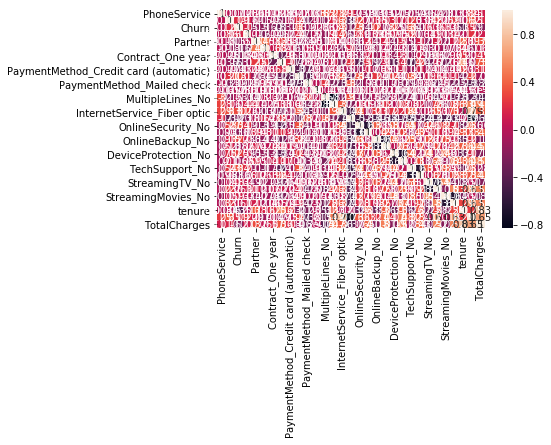

In [55]:
sns.heatmap(telecom.corr(), annot = True)

In [57]:
# Dropping highly correlated variables

In [60]:
# Feature Selection using RFE

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [62]:
from sklearn.feature_selection import RFE

In [65]:
rfe = RFE(logreg, 13)
rfe = rfe.fit(X, y)
print(rfe.ranking_)
print(rfe.support_)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [69]:
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check', 'MultipleLines_No']

In [70]:
log = LogisticRegression()
log.fit(X_train[col], y_train)

ValueError: bad input shape (2113, 30)